 <h1 style="text-align: center;">PROJECT ANALSYSIS ON SLEEP HEALTH AND LIFESTYLE</h1>


In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [3]:
# shape
df.shape

(374, 13)

In [4]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df.columns=df.columns.str.replace(" ","_").str.lower()

In [6]:
df.head(5)

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Data cleaning

In [7]:
df.fillna("No SD",inplace=True)

In [8]:
df.dtypes

person_id                    int64
gender                      object
age                          int64
occupation                  object
sleep_duration             float64
quality_of_sleep             int64
physical_activity_level      int64
stress_level                 int64
bmi_category                object
blood_pressure              object
heart_rate                   int64
daily_steps                  int64
sleep_disorder              object
dtype: object

In [9]:
df[['systolic', 'diastolic']] = df['blood_pressure'].str.split('/', expand=True).astype(int)

In [10]:
df

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder,systolic,diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No SD,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No SD,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No SD,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95


In [11]:
df.describe()

,person_id,age,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,heart_rate,daily_steps,systolic,diastolic
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


In [12]:
plt.style.use("bmh")

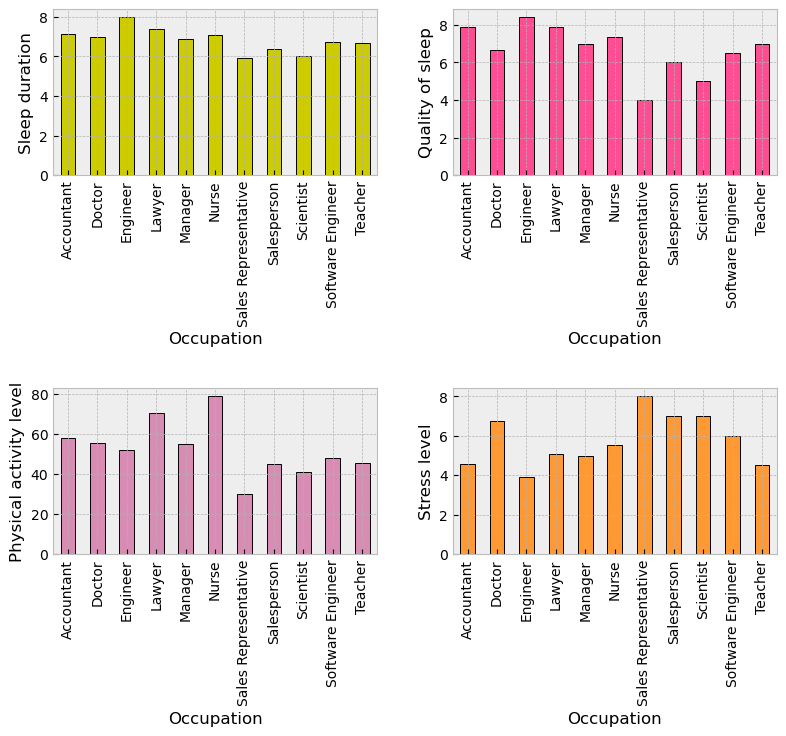

In [13]:
# bi-variate analysis for different aspect based on occupation
plt.figure(figsize=(8.5, 8))

# First subplot: Mean Sleep Duration by Occupation
plt.subplot(2, 2, 1)
df.groupby("occupation")["sleep_duration"].mean().plot(kind="bar",color="#cccc00",edgecolor="black",linewidth=0.7)
plt.ylabel("Sleep duration")
plt.xlabel("Occupation")

# Second subplot: Mean Quality of Sleep by Occupation
plt.subplot(2, 2, 2)
df.groupby("occupation")["quality_of_sleep"].mean().plot(kind="bar",color="#ff4d94",edgecolor="black",linewidth=0.7)
plt.ylabel("Quality of sleep")
plt.xlabel("Occupation")

# Third subplot: Mean Physical Activity Level by Occupation
plt.subplot(2, 2, 3)
df.groupby("occupation")["physical_activity_level"].mean().plot(kind="bar",color="#d98cb3",edgecolor="black",linewidth=0.7)
plt.ylabel("Physical activity level")
plt.xlabel("Occupation")

# Fourth subplot: Mean Stress Level by Occupation
plt.subplot(2, 2, 4)
df.groupby("occupation")["stress_level"].mean().plot(kind="bar",color="#ff9933",edgecolor="black",linewidth=0.7)
plt.ylabel("Stress level")
plt.xlabel("Occupation")

plt.tight_layout(pad=3.0)  # Adjust layout for better spacing
plt.show()

## Observation 1:
**--> Sales Representatives**: Sleep less than 6 hours on average, report a quality of sleep rating of 4, have an average stress level of 8, and engage in lower physical activity, averaging around 35 minutes.

**--> Sales Persons**: Tend to sleep approximately 6 hours, with a quality of sleep rating of 6. Their average stress level is 7, and they have a physical activity level of about 45 minutes.

**--> Scientists**: Sleep around 6 hours, report a quality of sleep rating of 5, have an average stress level of 7, and maintain a physical activity level of 40 minutes.

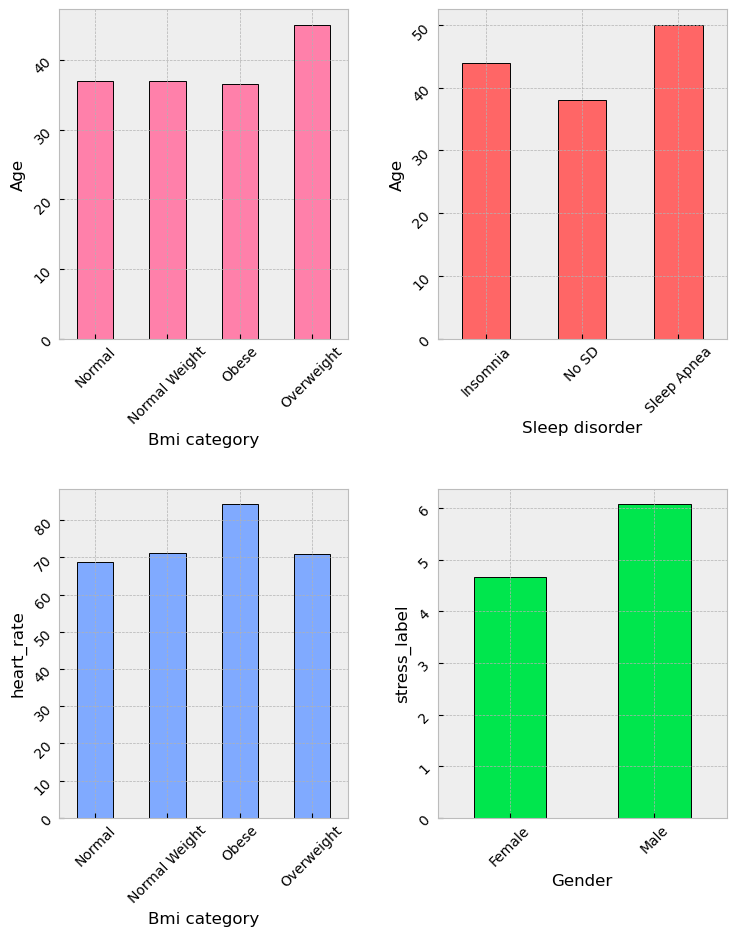

In [14]:
plt.figure(figsize=(8,10))
plt.subplot(2,2,1)
df.groupby(["bmi_category"])["age"].median().plot(kind="bar",color="#ff80aa",edgecolor="black",linewidth=0.7)
plt.xlabel("Bmi category")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.subplot(2,2,2)
df.groupby(["sleep_disorder"])["age"].median().plot(kind="bar",color="#ff6666",edgecolor="black",linewidth=0.7)
plt.ylabel("Age")
plt.xlabel("Sleep disorder")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.subplot(2,2,3)
df.groupby(["bmi_category"])["heart_rate"].mean().plot(kind="bar",color="#80aaff",edgecolor="black",linewidth=0.7)
plt.ylabel("heart_rate")
plt.xlabel("Bmi category")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.subplot(2,2,4)
df.groupby(["gender"])["stress_level"].mean().plot(kind="bar",color="#00e64d",edgecolor="black",linewidth=0.7)
plt.ylabel("stress_label")
plt.xlabel("Gender")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout(pad=3.0)
# plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

## Oberservation 2:
**--> Prevalence of Sleep Disorders**: Older individuals tend to experience a higher prevalence of sleep disorders.

**--> Heart Rate Comparison**: The average heart rate of obese individuals is consistently higher than that of individuals with normal weight.

**--> Age factor**: Compared to women, men have a higher average stress level.

In [15]:
df_1=df[["sleep_duration","quality_of_sleep","physical_activity_level","stress_level","heart_rate","daily_steps"]]

In [16]:
correlation_matrix = df_1.corr()
# To display the correlation matrix
print(correlation_matrix)

                         sleep_duration  quality_of_sleep  \
sleep_duration                 1.000000          0.883213   
quality_of_sleep               0.883213          1.000000   
physical_activity_level        0.212360          0.192896   
stress_level                  -0.811023         -0.898752   
heart_rate                    -0.516455         -0.659865   
daily_steps                   -0.039533          0.016791   

                         physical_activity_level  stress_level  heart_rate  \
sleep_duration                          0.212360     -0.811023   -0.516455   
quality_of_sleep                        0.192896     -0.898752   -0.659865   
physical_activity_level                 1.000000     -0.034134    0.136971   
stress_level                           -0.034134      1.000000    0.670026   
heart_rate                              0.136971      0.670026    1.000000   
daily_steps                             0.772723      0.186829   -0.030309   

                         

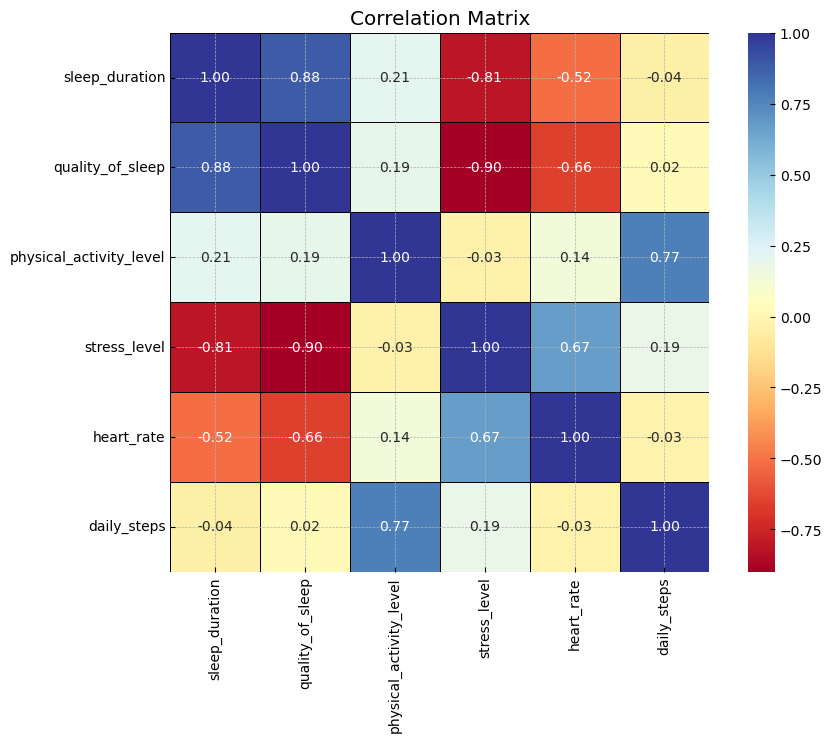

In [17]:
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdYlBu" , square=True, 
            xticklabels=df_1.columns, yticklabels=df_1.columns,linewidths=0.5, linecolor='black')
plt.title("Correlation Matrix")
plt.show()


## Observation 3:

**--> Strong Positive Correlations**:
Sleep Duration and Quality of Sleep (0.883):
This suggests that as sleep duration increases, the quality of sleep tends to improve.

Physical Activity Level and Daily Steps (0.773):
This indicates that individuals who engage in more physical activity also tend to take more steps daily.

**--> Strong Negative Correlations**:
Stress Level and Sleep Duration (-0.811):
Higher stress levels are associated with shorter sleep duration.

Stress Level and Quality of Sleep (-0.899):
increased stress is associated with poorer sleep quality.

Heart Rate and Quality of Sleep (-0.660):
This suggests that higher heart rates may be linked to lower sleep quality.

**--> Moderate Correlations**
Heart Rate and Stress Level (0.670):
The higher stress levels may correspond to higher heart rates.
